Image trouvée : E:\Mes PDF\M1 LMD\Semestre2\Traitement d'images\TP_Traitement_Images_M1AI\TP1\images8.JPG


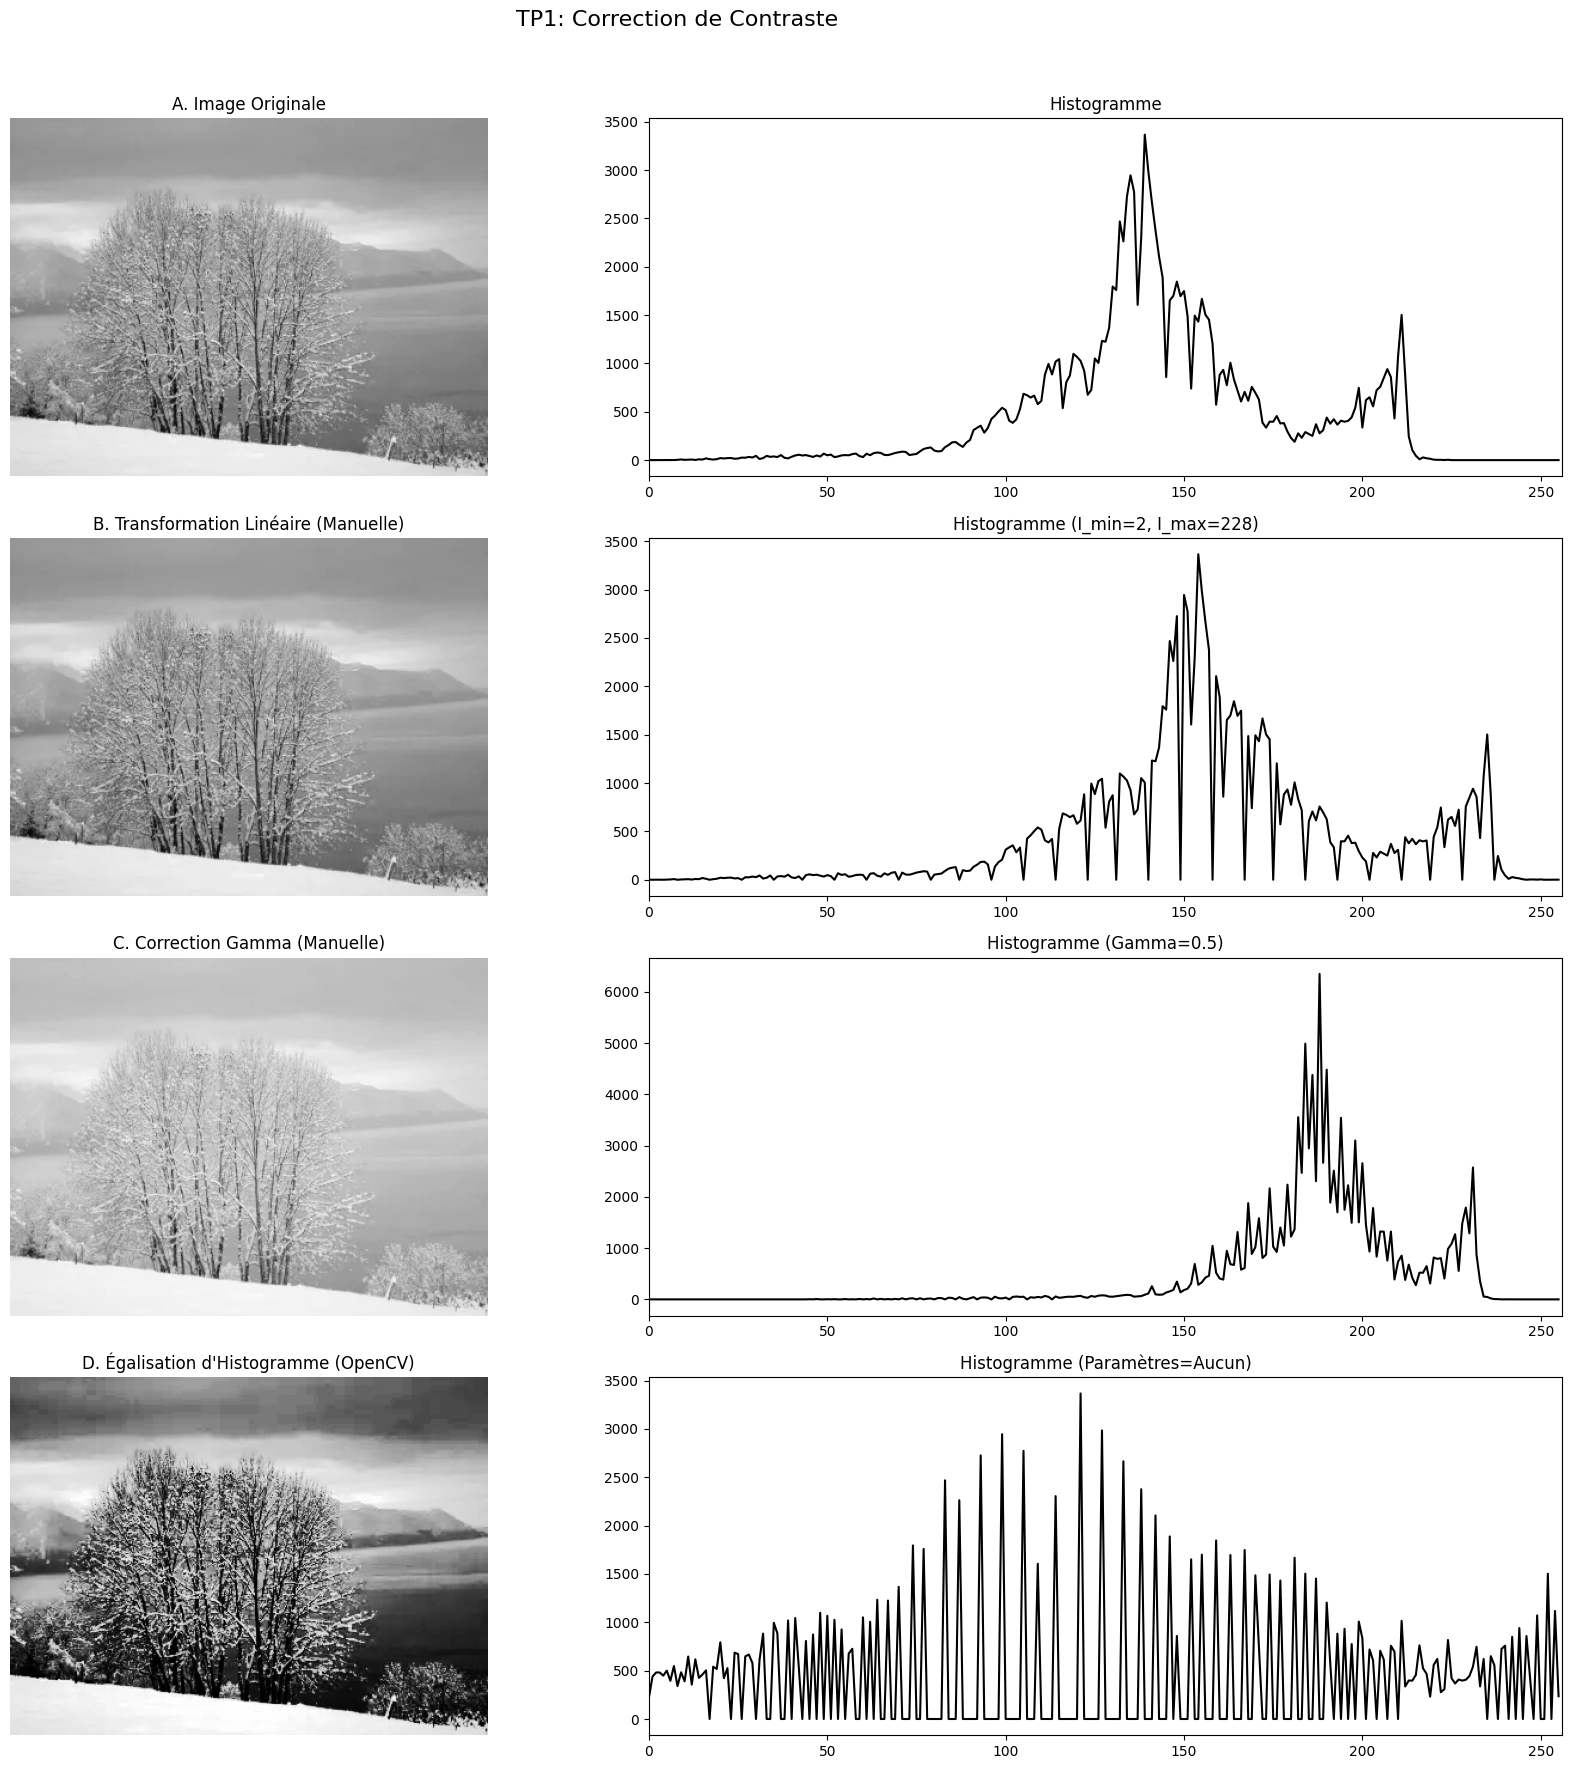


--- Paramètres d'Analyse pour le Rapport TP1 ---
Transformation Linéaire: I_min=2, I_max=228
Correction Gamma: Gamma=0.5
Égalisation d'Histogramme: Pas de paramètres


In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


# --- PARAMETRES GLOBAUX ---
# Recherche automatique de l'image relative au notebook
notebook_dir = Path().resolve()  # dossier du notebook
parent_dir = notebook_dir.parent  # dossier parent

# Chemins possibles à tester
possible_paths = [
    parent_dir / "TP1" / "images8.JPG",        # au même niveau: ../TP1/images10.JPG
    parent_dir.parent / "TP1" / "images8.JPG", # niveau supérieur: ../../TP1/images10.JPG
    notebook_dir / "images8.JPG",               # dans le même dossier du notebook
]

# Trouver le premier chemin existant
IMAGE_PATH = None
for path in possible_paths:
    if path.exists():
        IMAGE_PATH = str(path)
        print(f"Image trouvée : {IMAGE_PATH}")
        break

if IMAGE_PATH is None:
    print("Image non trouvée. Chemins testés :")
    for p in possible_paths:
        print(f"  - {p}")
    print("\n Solution : placez images10.JPG dans le dossier 'TP1' au même niveau que votre notebook.")
    raise FileNotFoundError("images8.JPG introuvable")

GAMMA_TEST_VALUE = 0.5  # Valeur de gamma pour éclaircir (gamma < 1)

# --- FONCTIONS UTILITAIRES ---

def calculer_histogramme(image):
    """Calcule l'histogramme d'une image en niveaux de gris."""
    return cv2.calcHist([image], [0], None, [256], [0, 256])

def afficher_resultat(ax, image, hist, titre, params=None):
    """Fonction utilitaire pour afficher une image et son histogramme."""
    
    # Affichage de l'image
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title(titre)
    ax[0].axis('off')
    
    # Affichage de l'histogramme
    ax[1].plot(hist, color='black')
    ax[1].set_title('Histogramme')
    ax[1].set_xlim([0, 256])
    
    # Ajout des parametres dans le titre de l'histogramme si fournis
    if params:
        param_text = ", ".join([f"{k}={v}" for k, v in params.items()])
        ax[1].set_title(f'Histogramme ({param_text})')

# --- FONCTION DE LA TRANSFORMATION LINEAIRE ---

def transformation_lineaire(image_grise):
    """Implémentation  de l'étirement de contraste linéaire."""
    I_min = np.min(image_grise)
    I_max = np.max(image_grise)
    
    if I_max == I_min:
        return image_grise.copy(), I_min, I_max

    # Formule vectorisée: O = ((I - I_min) / (I_max - I_min)) * 255
    image_etiree = (image_grise.astype(float) - I_min) * (255.0 / (I_max - I_min))
    
    # Clip et conversion en uint8
    image_etiree = np.clip(image_etiree, 0, 255).astype(np.uint8)
    
    return image_etiree, I_min, I_max

def correction_gamma(image_grise, gamma):
    """Implémentation de la correction Gamma."""
    # Normalisation [0, 1]
    image_float = image_grise.astype(np.float32) / 255.0
    
    # Application de la formule O = I^gamma
    image_corrigee = np.power(image_float, gamma)
    
    # Dénormalisation [0, 255] et conversion en uint8
    image_corrigee = (image_corrigee * 255.0).astype(np.uint8)
    
    return image_corrigee

# --- EXECUTION GLOBALE ET VISUALISATION DES TROIS METHODES ---

# 1. Chargement de l'image (en niveaux de gris)
image_originale = cv2.imread(IMAGE_PATH, 0)

if image_originale is None:
    raise FileNotFoundError(f"Erreur: Impossible de charger l'image a l'emplacement: {IMAGE_PATH}")

hist_original = calculer_histogramme(image_originale)

# 2. Preparation de la figure pour les 4 resultats
fig = plt.figure(figsize=(18, 18))
plt.suptitle(f"TP1: Correction de Contraste", fontsize=16)

# --- A. Affichage Original ---
ax_orig = [fig.add_subplot(4, 2, 1), fig.add_subplot(4, 2, 2)]
afficher_resultat(ax_orig, image_originale, hist_original, "A. Image Originale")

# --- B. Transformation Linéaire ---
image_lineaire, I_min, I_max = transformation_lineaire(image_originale)
hist_lineaire = calculer_histogramme(image_lineaire)

ax_lin = [fig.add_subplot(4, 2, 3), fig.add_subplot(4, 2, 4)]
afficher_resultat(ax_lin, image_lineaire, hist_lineaire, 
                  "B. Transformation Linéaire (Manuelle)", 
                  params={'I_min': I_min, 'I_max': I_max})

# --- C. Correction Gamma ---
image_gamma = correction_gamma(image_originale, GAMMA_TEST_VALUE)
hist_gamma = calculer_histogramme(image_gamma)

ax_gamma = [fig.add_subplot(4, 2, 5), fig.add_subplot(4, 2, 6)]
afficher_resultat(ax_gamma, image_gamma, hist_gamma, 
                  "C. Correction Gamma (Manuelle)", 
                  params={'Gamma': GAMMA_TEST_VALUE})

# --- D. Égalisation d'Histogramme (OpenCV) ---
image_egalisée = cv2.equalizeHist(image_originale)
hist_egalise = calculer_histogramme(image_egalisée)

ax_egal = [fig.add_subplot(4, 2, 7), fig.add_subplot(4, 2, 8)]
afficher_resultat(ax_egal, image_egalisée, hist_egalise, 
                  "D. Égalisation d'Histogramme (OpenCV)", 
                  params={'Paramètres': 'Aucun'})

plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajustement pour le suptitle
plt.show()

print(f"\n--- Paramètres d'Analyse pour le Rapport TP1 ---")
print(f"Transformation Linéaire: I_min={I_min}, I_max={I_max}")
print(f"Correction Gamma: Gamma={GAMMA_TEST_VALUE}")
print(f"Égalisation d'Histogramme: Pas de paramètres")

In [4]:
print(cv2.__version__ )

4.12.0


In [8]:
import matplotlib as mpl
print("matplotlib", mpl.__version__)

matplotlib 3.10.8


*** Début du TP2 - Réduction des Bruits (Kernel: 5x5) ***



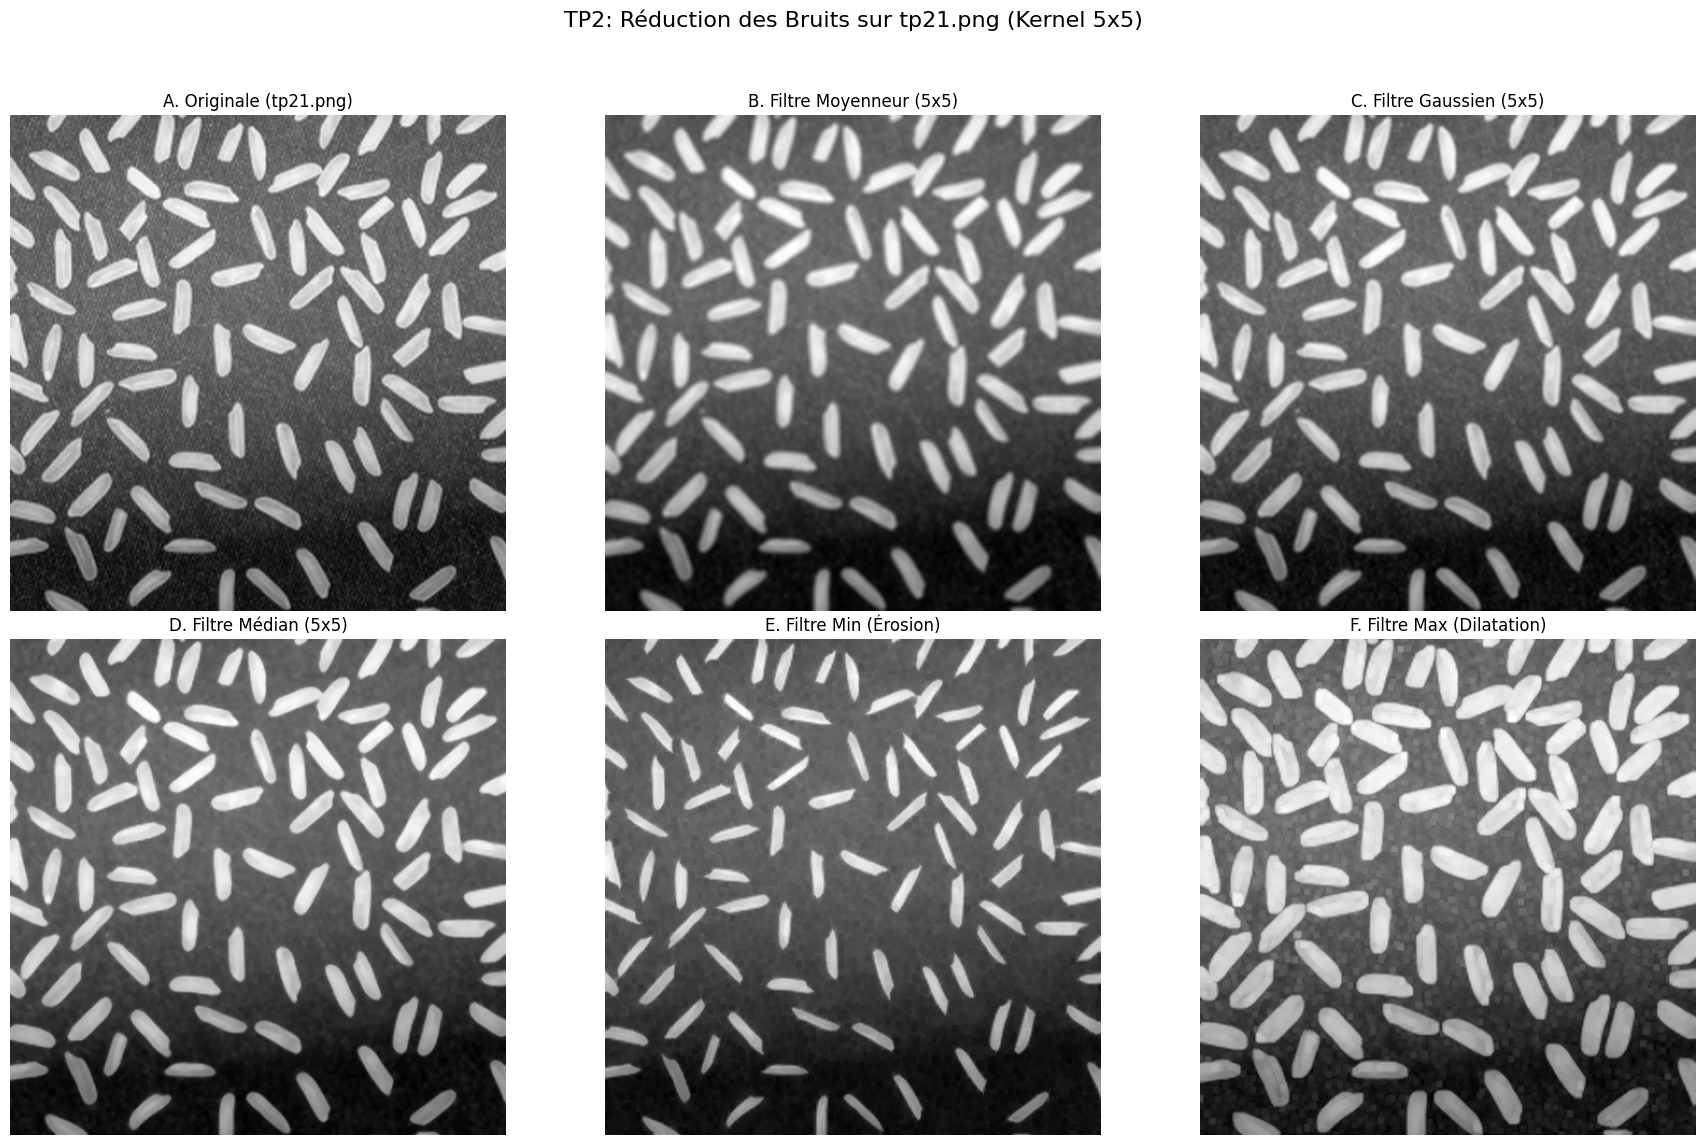

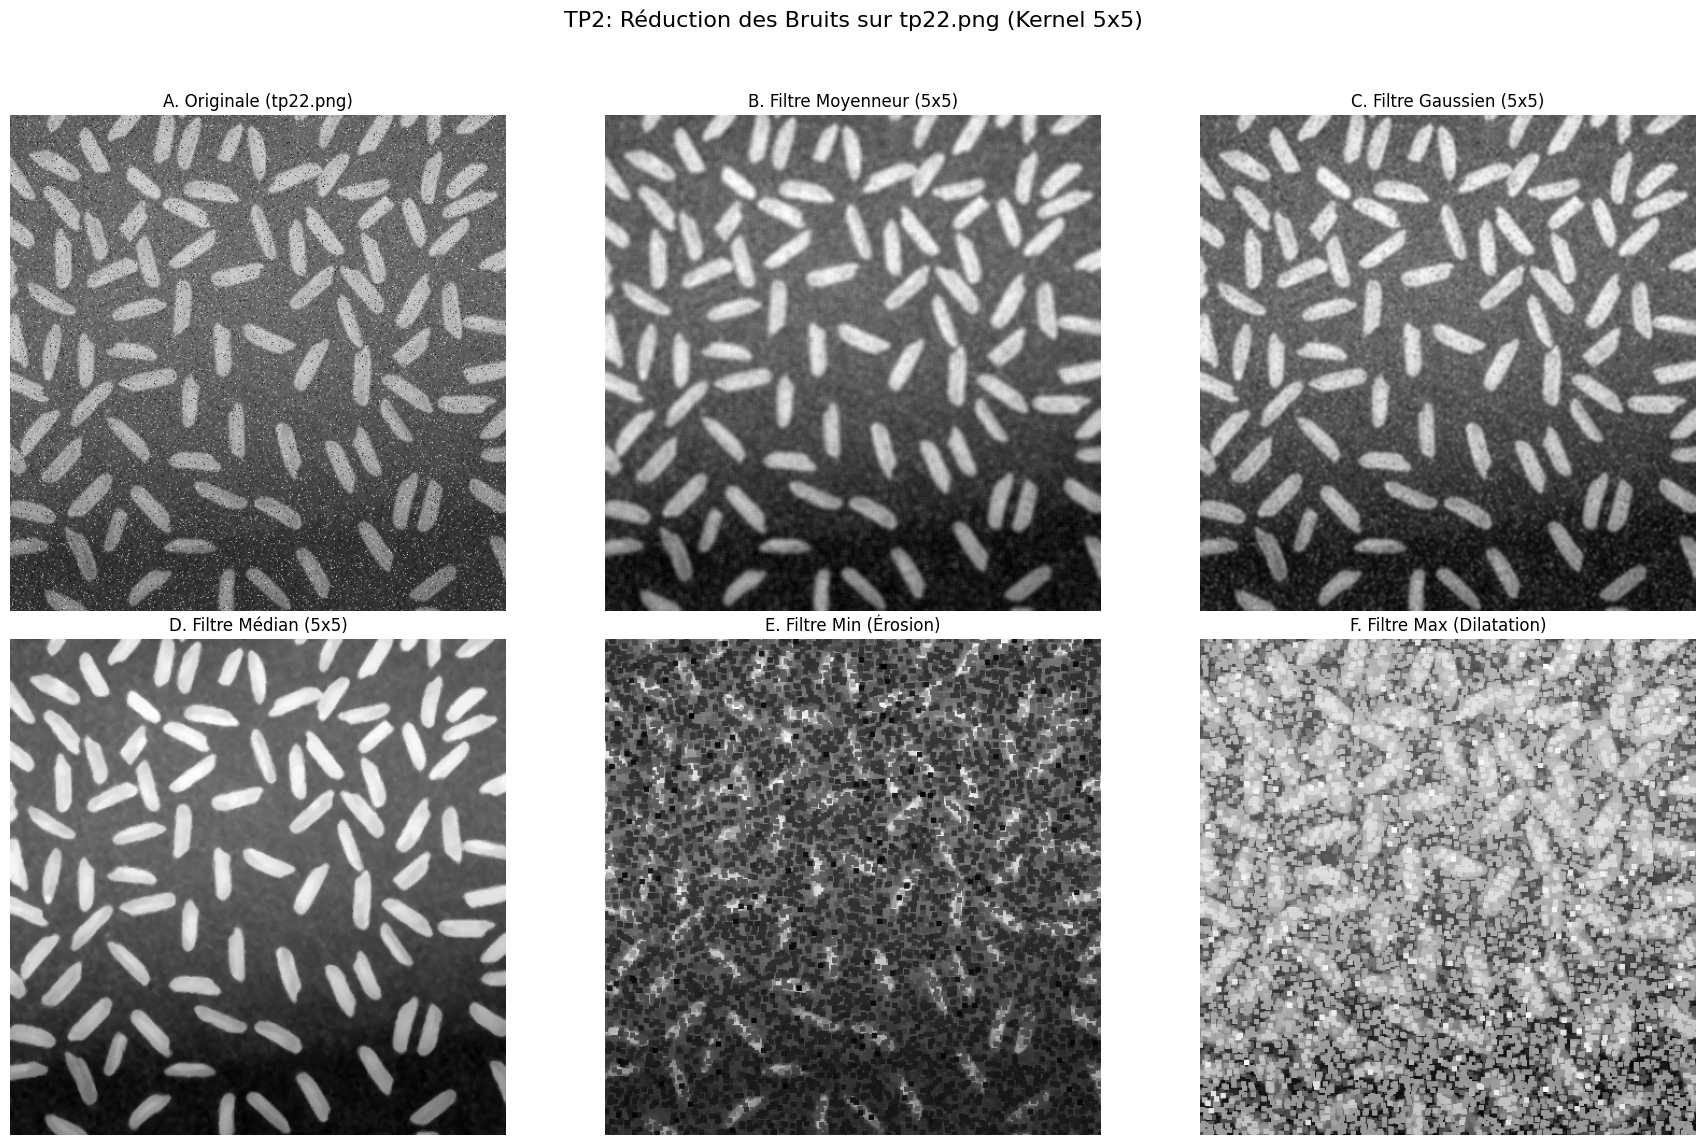

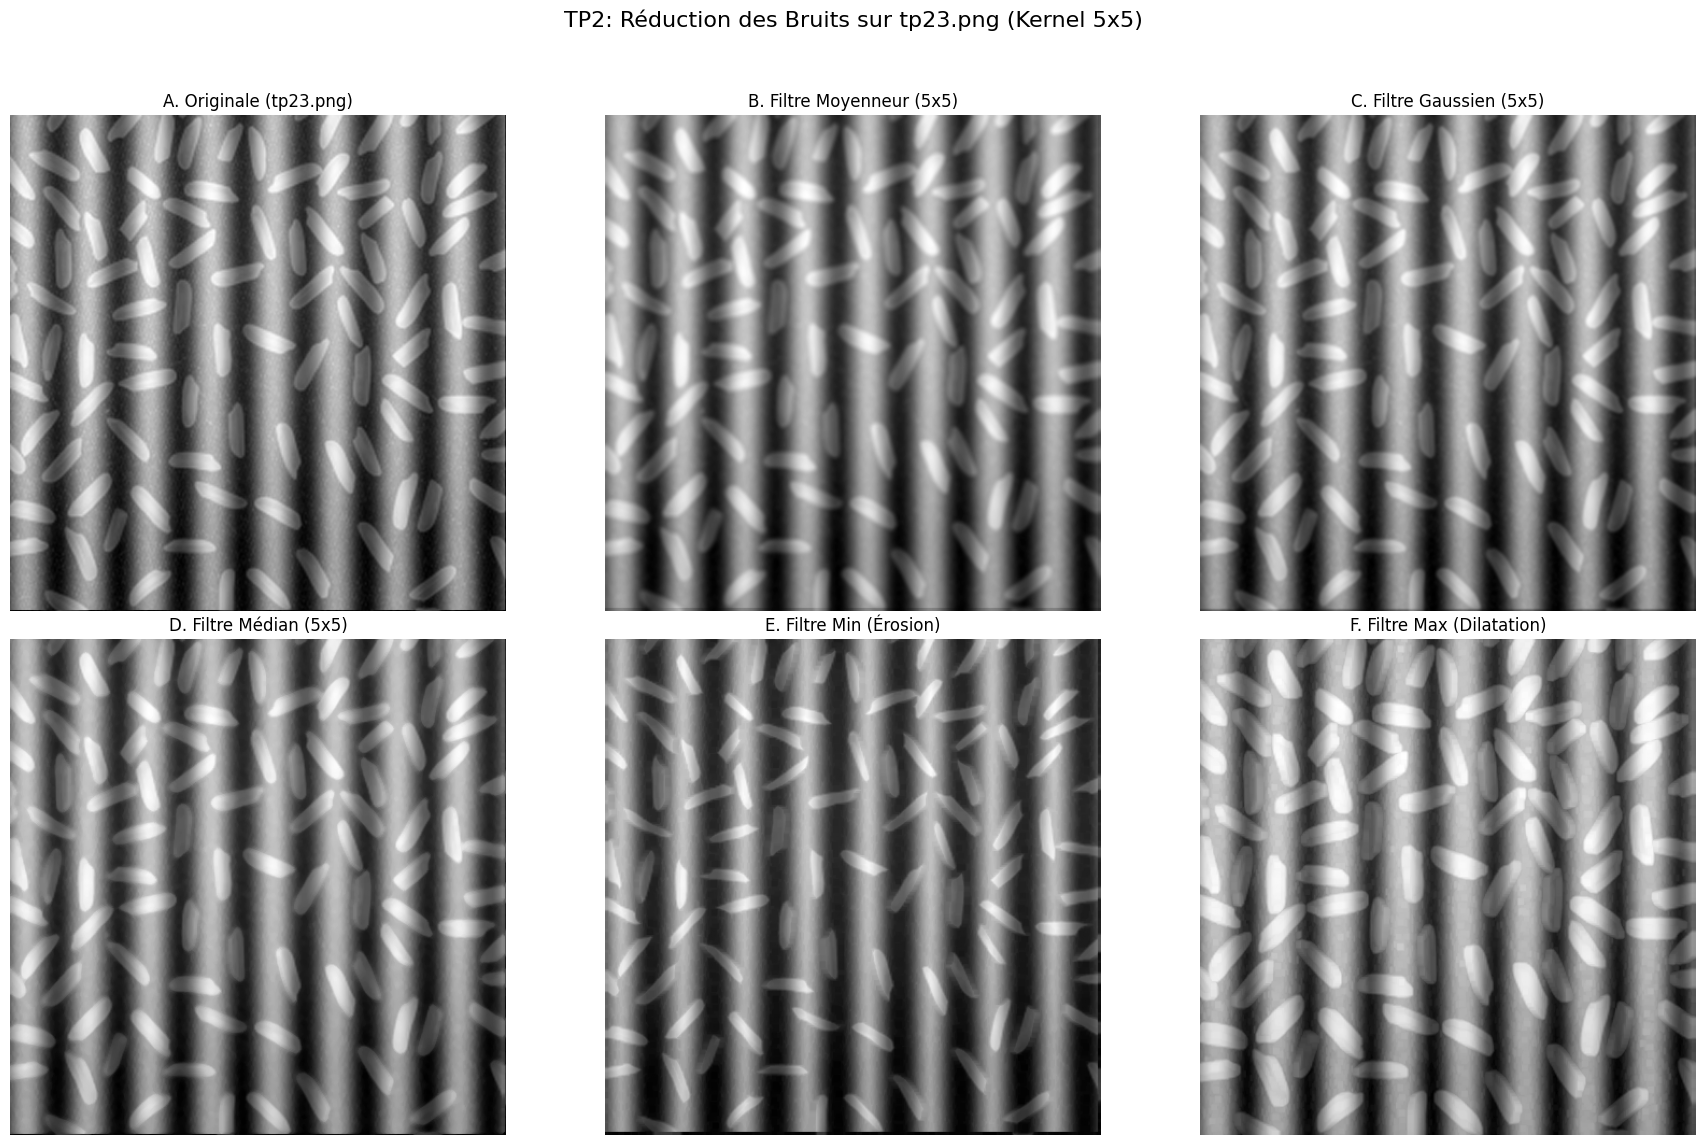

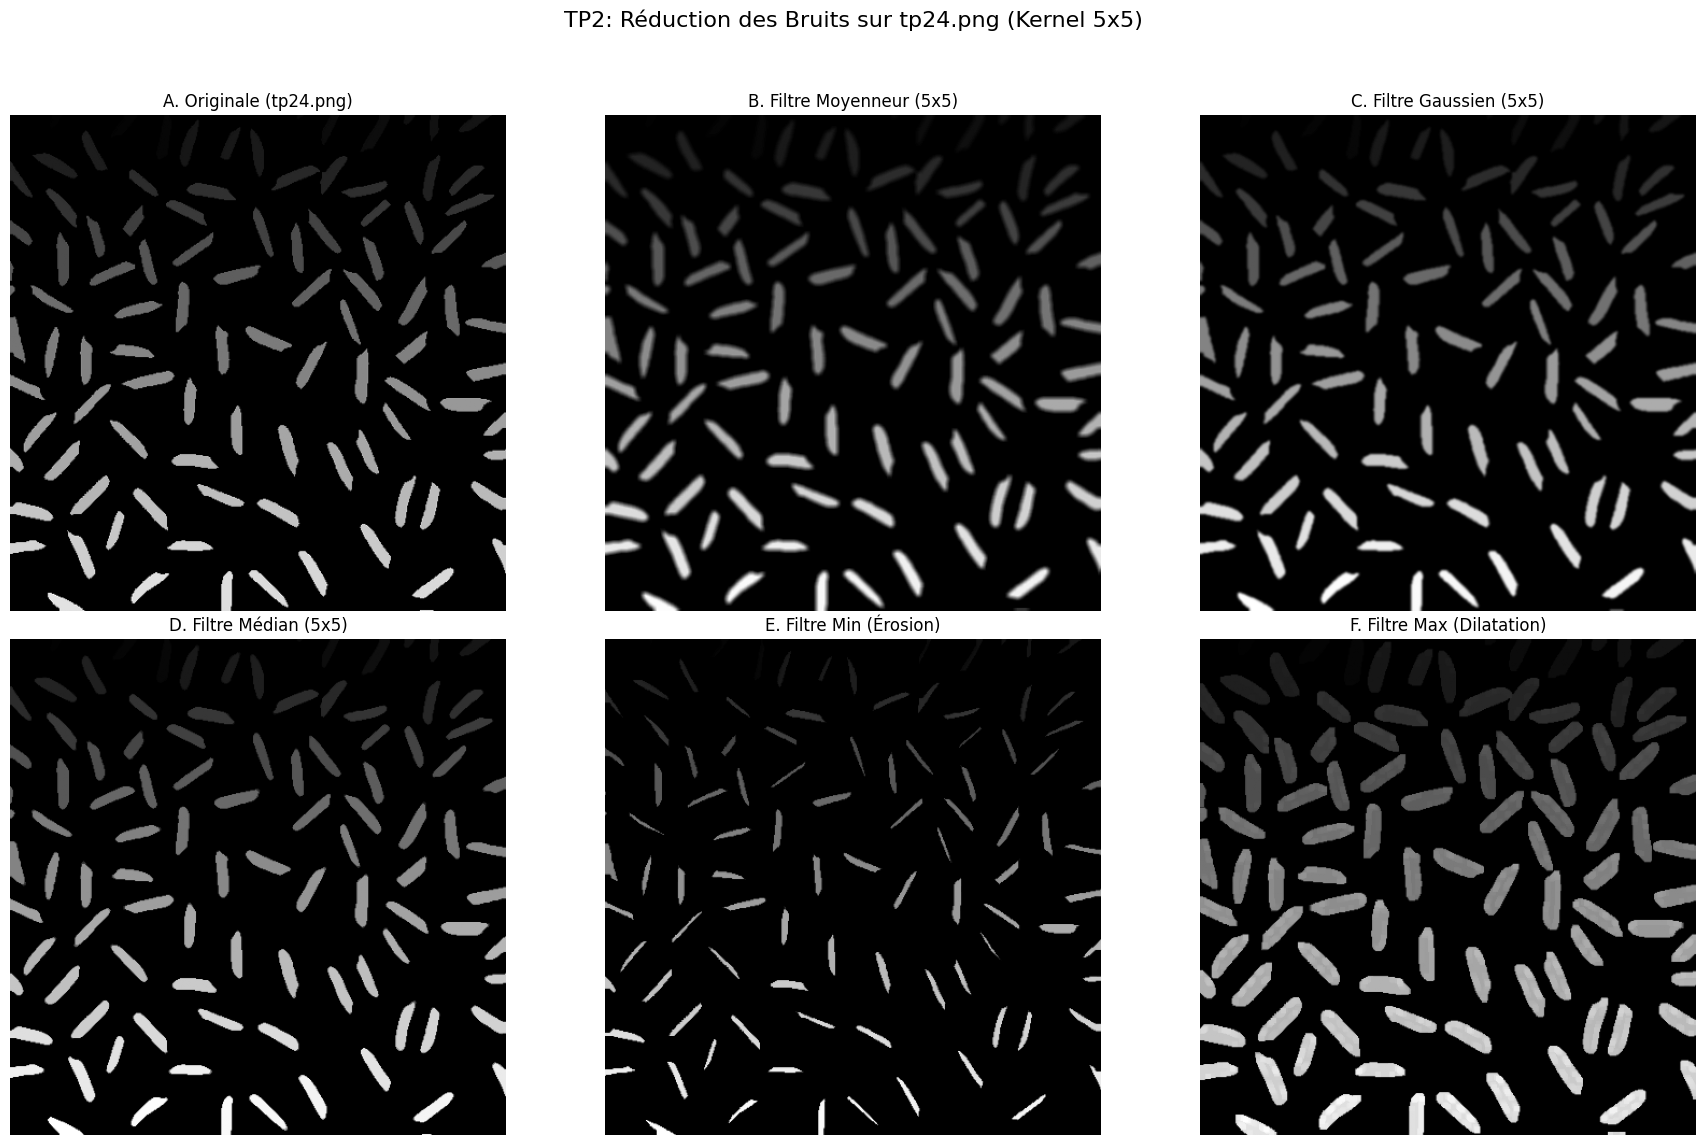


*** Analyse de l'influence des paramètres (Taille du filtre) ***


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import zipfile

# --- PARAMETRES ---
# chemins relatifs fournis (peuvent pointer dans un zip ou être relatifs)
IMAGE_PATHS_TP2 = [
    "Data_TP1.zip/Data_TP1/TP2/tp21.png",
    "Data_TP1.zip/Data_TP1/TP2/tp22.png",
    "Data_TP1.zip/Data_TP1/TP2/tp23.png",
    "Data_TP1.zip/Data_TP1/TP2/tp24.png"
]

notebook_dir = Path().resolve()

def resolve_image_path(rel_path):
    """Retourne un chemin utilisable : gère zip, chemins relatifs et recherche dans dossiers frères."""
    rel = Path(rel_path)
    # cas : chemin déjà existant (absolu ou relatif)
    if rel.exists():
        return str(rel)

    # si le chemin contient un zip en premier segment: 'Data_TP1.zip/...'
    parts = rel.parts
    if parts and parts[0].lower().endswith(".zip"):
        zip_candidate = notebook_dir / parts[0]
        if zip_candidate.exists() and zipfile.is_zipfile(zip_candidate):
            extract_dir = notebook_dir / (zip_candidate.stem + "_extracted")
            if not extract_dir.exists():
                extract_dir.mkdir(parents=True, exist_ok=True)
                with zipfile.ZipFile(zip_candidate, 'r') as z:
                    z.extractall(extract_dir)
            inner = Path(*parts[1:])
            candidate = extract_dir / inner
            if candidate.exists():
                return str(candidate)

    # chercher le fichier par nom dans plusieurs dossiers plausibles
    filename = rel.name
    search_dirs = [notebook_dir, notebook_dir.parent] + [p for p in notebook_dir.parent.iterdir() if p.is_dir()]
    for d in search_dirs:
        # chemins usuels dans une structure TP_Traitement_Images_M1AI
        candidates = [
            d / filename,
            d / "TP2" / filename,
            d / "TP1" / "TP2" / filename,
            d / "Data_TP1" / "TP2" / filename,
        ]
        for c in candidates:
            if c.exists():
                return str(c)

    # si rien trouvé, retourne l'original (cv2.imread renverra None)
    return str(rel_path)

KERNEL_SIZE = 5  # Taille du filtre (doit etre impair)
kernel = np.ones((KERNEL_SIZE, KERNEL_SIZE), np.uint8) # Noyau pour les filtres Min/Max

# --- FONCTION DE TRAITEMENT ---
def appliquer_filtres_bruit(image_path, K_SIZE):
    """Charge une image et applique les 5 filtres anti-bruit demandés."""
    image_originale = cv2.imread(image_path, 0)
    if image_originale is None:
        print(f"Erreur: Impossible de charger l'image a l'emplacement: {image_path}")
        return

    image_name = Path(image_path).name
    image_moyenneur = cv2.blur(image_originale, (K_SIZE, K_SIZE))
    image_gaussien = cv2.GaussianBlur(image_originale, (K_SIZE, K_SIZE), 0)
    image_median = cv2.medianBlur(image_originale, K_SIZE)
    image_min = cv2.erode(image_originale, kernel, iterations=1)
    image_max = cv2.dilate(image_originale, kernel, iterations=1)

    titres = [
        f"A. Originale ({image_name})",
        f"B. Filtre Moyenneur ({K_SIZE}x{K_SIZE})",
        f"C. Filtre Gaussien ({K_SIZE}x{K_SIZE})",
        f"D. Filtre Médian ({K_SIZE}x{K_SIZE})",
        f"E. Filtre Min (Érosion)",
        f"F. Filtre Max (Dilatation)"
    ]
    images = [image_originale, image_moyenneur, image_gaussien, image_median, image_min, image_max]

    plt.figure(figsize=(18, 12))
    plt.suptitle(f"TP2: Réduction des Bruits sur {image_name} (Kernel {K_SIZE}x{K_SIZE})", fontsize=16)
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titres[i])
        plt.axis('off')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# --- EXECUTION GLOBALE ---
print(f"*** Début du TP2 - Réduction des Bruits (Kernel: {KERNEL_SIZE}x{KERNEL_SIZE}) ***\n")
for rel in IMAGE_PATHS_TP2:
    real_path = resolve_image_path(rel)
    appliquer_filtres_bruit(real_path, KERNEL_SIZE)

print("\n*** Analyse de l'influence des paramètres (Taille du filtre) ***")
# Pour tester l'influence des paramètres, changez KERNEL_SIZE de 5 a 9 et relancez le code
#print("Pour le rapport, testez KERNEL_SIZE = 9 sur tp22.png pour comparer l'impact.")

Chemin utilisé pour contours : E:\Mes PDF\M1 LMD\Semestre2\Traitement d'images\TP_Traitement_Images_M1AI\TP1_Correction_Contraste\Data_TP1_extracted\Data_TP1\TP2\tp24.png


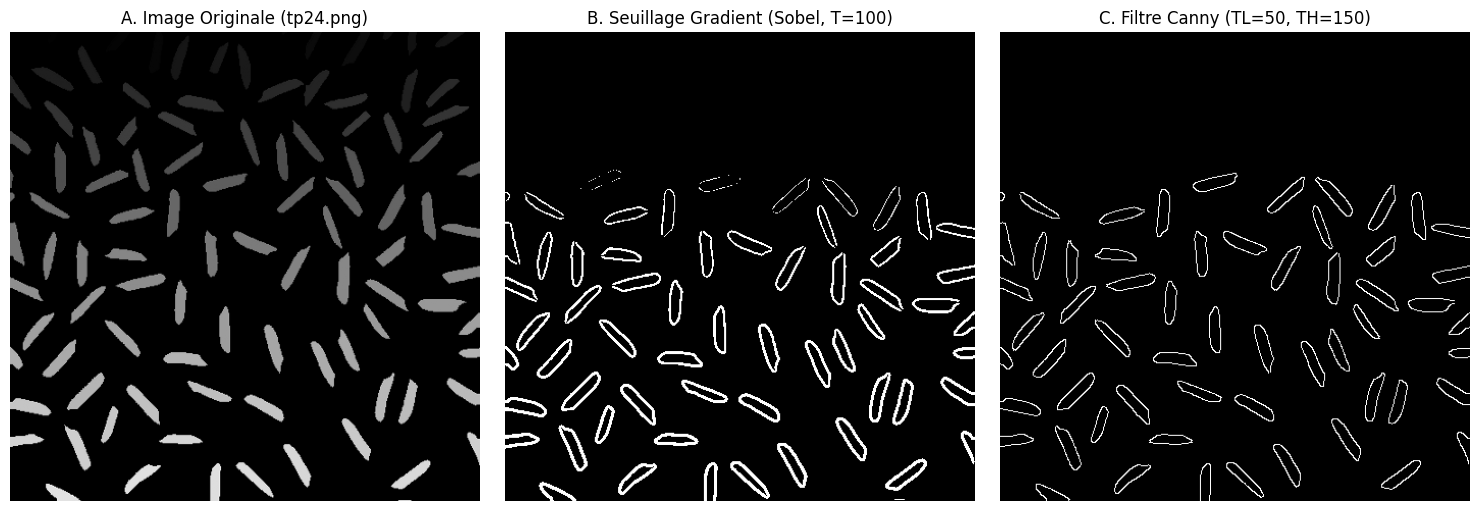